# BeautifulSoup 모듈
- 홈페이지 내 데이터를 쉽게 추출할 수 있도록 도와주는 파이썬 외부 라이브러리
- 웹문서 내 수많은 HTML 태그들을 파서(parser)를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
- 웹 문서 구조를 알고 있다면, 아주 편하게 원하는 데이터를 뽑아서 활용할 수 있다.
- requests, urllib, selenium모듈과 함께 사용된다.
    - BeautifulSoup는 HTML을 파싱하여 구조화 하는 모듈
- BeautifulSoup.태그명 : 해당 태그를 HTML에서 가져온다.
- 태그['속성']:html 해당 태그의 속성에 대한 정보를 가져온다.

# Requests에서의 BeautifulSoup

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
URL = "https://datalab.naver.com/keyword/realtimeList.naver"
header = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'}
response = requests.get(URL, headers=header)
html_data = response.text
temp = html_data.split('<div class="ranking_box">')[1]
temp = temp.split('<span class="item_title">')
del temp[0]
co = 0
for x in temp:
    data = x.split('</span>')[0]
    co += 1
    print("실시간 검색어 {}위 : {}".format(co, data))

실시간 검색어 1위 : 송중기 변호사
실시간 검색어 2위 : 데이케어센터
실시간 검색어 3위 : 송중기
실시간 검색어 4위 : 바퀴달린집
실시간 검색어 5위 : 주가
실시간 검색어 6위 : 가세연
실시간 검색어 7위 : 삼성sdi우
실시간 검색어 8위 : ps5
실시간 검색어 9위 : 가세연 송중기
실시간 검색어 10위 : 증시
실시간 검색어 11위 : 두산솔루스
실시간 검색어 12위 : 제넥신
실시간 검색어 13위 : 두산퓨얼셀
실시간 검색어 14위 : 류승범 여자친구
실시간 검색어 15위 : 코스피
실시간 검색어 16위 : 코스닥
실시간 검색어 17위 : 논산 코로나
실시간 검색어 18위 : 퀸와사비
실시간 검색어 19위 : 창녕 아동학대
실시간 검색어 20위 : 내일날씨


In [3]:
soup=BeautifulSoup(html_data,'html.parser')

In [4]:
targets=soup.find_all('span','item_title')

In [5]:
for target in targets:
    print(target.get_text())

송중기 변호사
데이케어센터
송중기
바퀴달린집
주가
가세연
삼성sdi우
ps5
가세연 송중기
증시
두산솔루스
제넥신
두산퓨얼셀
류승범 여자친구
코스피
코스닥
논산 코로나
퀸와사비
창녕 아동학대
내일날씨


In [6]:
url='https://www.naver.com'
resp=requests.get(url)
html=resp.text
soup=BeautifulSoup(html,'html.parser')


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
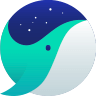
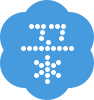

In [7]:
soup

'<!DOCTYPE html>\n<html data-dark="false" lang="ko">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   NAVER\n  </title>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=1190" name="viewport"/>\n  <meta content="NAVER" name="apple-mobile-web-app-title">\n   <meta content="index,nofollow" name="robots">\n    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">\n     <meta content="네이버" property="og:title"/>\n     <meta content="https://www.naver.com/" property="og:url"/>\n     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>\n     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">\n      <meta content="summary" name="twitter:card"/>\n      <meta content="" name="twitter:title"/>\n      <meta content="https://www.naver.com/" name="twitter:url"/>\n      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" n
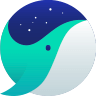
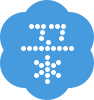

In [8]:
soup.prettify()

## html로 파싱할 때, 문제가 있을시 자동으로 수정

In [9]:
print(BeautifulSoup("<a></p>",'html.parser'))

<a></a>


In [10]:
print(BeautifulSoup("<a></p>",'html5lib'))

<html><head></head><body><a><p></p></a></body></html>


In [11]:
print(BeautifulSoup("<a></p>",'lxml'))

<html><body><a></a></body></html>


In [12]:
print(BeautifulSoup("<a><b/></a>",'xml'))

<?xml version="1.0" encoding="utf-8"?>
<a><b/></a>


# urllib에서 BeautifulSoup 사용해보기

In [13]:
import urllib.request

In [14]:
resp2=urllib.request.urlopen(url)
byte_data=resp2.read()
html2=byte_data.decode()

'\n<!doctype html>                     <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서
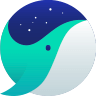
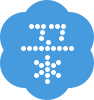

In [15]:
html2

In [16]:
soup2=BeautifulSoup(html2,'html.parser')

'<!DOCTYPE html>\n<html data-dark="false" lang="ko">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   NAVER\n  </title>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=1190" name="viewport"/>\n  <meta content="NAVER" name="apple-mobile-web-app-title">\n   <meta content="index,nofollow" name="robots">\n    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">\n     <meta content="네이버" property="og:title"/>\n     <meta content="https://www.naver.com/" property="og:url"/>\n     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>\n     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">\n      <meta content="summary" name="twitter:card"/>\n      <meta content="" name="twitter:title"/>\n      <meta content="https://www.naver.com/" name="twitter:url"/>\n      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" n
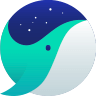
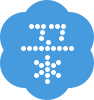

In [17]:
soup2.prettify()


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
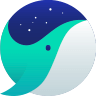
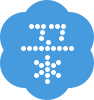

In [18]:
soup2

# 기타 여러가지기능

'<!DOCTYPE html>\n<html data-dark="false" lang="ko">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   NAVER\n  </title>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=1190" name="viewport"/>\n  <meta content="NAVER" name="apple-mobile-web-app-title">\n   <meta content="index,nofollow" name="robots">\n    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">\n     <meta content="네이버" property="og:title"/>\n     <meta content="https://www.naver.com/" property="og:url"/>\n     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>\n     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">\n      <meta content="summary" name="twitter:card"/>\n      <meta content="" name="twitter:title"/>\n      <meta content="https://www.naver.com/" name="twitter:url"/>\n      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" n
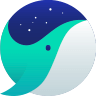
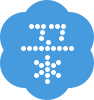

In [19]:
soup.prettify()

In [22]:
soup.title

<title>NAVER</title>

In [23]:
soup.title.name #태그의 이름알려줌.

'title'

In [24]:
soup.title.string #타이틀 태그가 감싸고있는 스트링값 반환

'NAVER'

In [25]:
soup.img

<img alt="" class="bn_m" height="48" src="https://s.pstatic.net/static/www/img/uit/2020/img_whale_banner.483e9e.png" width="150"/>

In [26]:
soup.img['class']

['bn_m']

In [27]:
soup.img['src']

'https://s.pstatic.net/static/www/img/uit/2020/img_whale_banner.483e9e.png'

# Soup의 꽃 find와 find_all
- find('태그명') : html의 해당 태그에 대한 첫번째 정보를 가져온다.
- find_all('태그명') : html의 해당 태그에 대한 모든 정보를 가져온다(리스트)

In [28]:
soup.find_all('a',limit=2)

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>,
 <a href="#themecast"><span>주제별캐스트 바로가기</span></a>]

## find_all의 옵션들

In [29]:
soup.find_all('span',class_='blind')

[<span class="blind">NAVER whale</span>,
 <span class="blind">네이버</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">검색</span>,
 <span class="blind">입력도구</span>,
 <span class="blind _text">자동완성/최근검색어 펼치기</span>,
 <span class="blind">도움말 보기</span>,
 <span class="blind">선택됨</span>,
 <span class="blind">알림</span>,
 <span class="blind">리스트형</span>,
 <span class="blind">썸네일형</span>,
 <span class="blind">설정</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</spa

In [30]:
soup.find_all('span',attrs={"class":'blind'})

[<span class="blind">NAVER whale</span>,
 <span class="blind">네이버</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">검색</span>,
 <span class="blind">입력도구</span>,
 <span class="blind _text">자동완성/최근검색어 펼치기</span>,
 <span class="blind">도움말 보기</span>,
 <span class="blind">선택됨</span>,
 <span class="blind">알림</span>,
 <span class="blind">리스트형</span>,
 <span class="blind">썸네일형</span>,
 <span class="blind">설정</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</spa

In [39]:
soup.find_all(string='청소년보호정책')

['청소년보호정책']

In [40]:
import re

In [41]:
soup.find_all(string=re.compile('네이버'))

['네이버 웨일',
 '네이버',
 '네이버를 시작페이지로',
 '쥬니어네이버',
 '네이버뉴스',
 '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.',
 '네이버 오디오클립',
 '네이버 연애·결혼',
 '네이버 연애결혼',
 '네이버 연애결혼',
 '네이버 연애결혼',
 '네이버 연애결혼',
 '네이버 연애결혼',
 '네이버 연애결혼',
 '네이버 연애결혼',
 '네이버 연애결혼',
 '네이버 개발자 센터',
 '네이버 D2',
 '네이버 D2SF',
 '네이버 랩스',
 '네이버 정책 및 약관',
 '네이버 정책']

# select_one과 select

In [42]:
soup.select_one('a')

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>,
 <a href="#themecast"><span>주제별캐스트 바로가기</span></a>,
 <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>,
 <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>,
 <a href="#account"><span>로그인 바로가기</span></a>,
 <a class="link_banner" data-clk="dropbanner1" href="https://whale.naver.com/ko/?=main">
 <i class="ico_naver_whale"><span class="blind">NAVER whale</span></i>
 <img alt="" class="bn_m" height="48" src="https://s.pstatic.net/static/www/img/uit/2020/img_whale_banner.483e9e.png" width="150"/>
 <p class="banner_text">인터넷의 새로운 시작! <strong class="bn_st">네이버 웨일</strong>로 차원이 다른 웹서핑을 경험해보세요!<button class="bn_btn_download" data-clk-custom="dropdownload1" id="NM_whale_download_btn" type="button">다운로드</button></p>
 <button class="btn_close" data-clk="dropclose1" data-ui-cookie-exp-days="3" data-ui-cookie-key="NM_TOP_PROMOTION" data-ui-cookie-value="1" data-ui-hide-target="#NM_TOP_BANNER" type="button">3일 동안 보지 않기</button>
 </a>,
 <a download="" hre
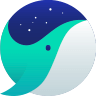
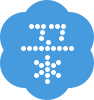

In [43]:
soup.select('a')

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>,
 <a href="#themecast"><span>주제별캐스트 바로가기</span></a>,
 <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>,
 <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>,
 <a href="#account"><span>로그인 바로가기</span></a>,
 <a class="link_banner" data-clk="dropbanner1" href="https://whale.naver.com/ko/?=main">
 <i class="ico_naver_whale"><span class="blind">NAVER whale</span></i>
 <img alt="" class="bn_m" height="48" src="https://s.pstatic.net/static/www/img/uit/2020/img_whale_banner.483e9e.png" width="150"/>
 <p class="banner_text">인터넷의 새로운 시작! <strong class="bn_st">네이버 웨일</strong>로 차원이 다른 웹서핑을 경험해보세요!<button class="bn_btn_download" data-clk-custom="dropdownload1" id="NM_whale_download_btn" type="button">다운로드</button></p>
 <button class="btn_close" data-clk="dropclose1" data-ui-cookie-exp-days="3" data-ui-cookie-key="NM_TOP_PROMOTION" data-ui-cookie-value="1" data-ui-hide-target="#NM_TOP_BANNER" type="button">3일 동안 보지 않기</button>
 </a>,
 <a download="" hre
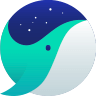
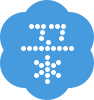

In [44]:
soup.select('body a')

In [45]:
soup.select('div > ul')

[<ul class="_resultBox"></ul>,
 <ul class="_resultBox"></ul>,
 <ul class="_resultBox"></ul>,
 <ul class="_resultBox"></ul>,
 <ul><li class="on _recentTab"><a href="javascript:;">최근검색어</a></li><li class="_myTab"><a href="javascript:;">내 검색어</a></li></ul>,
 <ul><li data-rank="@rank@"><a class="t@my@ _star _myBtn" href="javascript:;" title="내 검색어 등록"><em class="spat">내 검색어 등록</em></a><a class="keyword" href="javascript:;">@txt@</a><em class="keyword_date">@date@.</em><a class="btn_delete spat _del" href="javascript:;" title="검색어삭제">삭제</a><span style="display:none">@in_txt@</span></li></ul>,
 <ul><li data-rank="@rank@"><a class="ton _star _myBtn" href="javascript:;" title="내 검색어 해제"><em class="spat">내 검색어 해제</em></a><a class="keyword" href="javascript:;">@txt@</a></li></ul>,
 <ul class="list_nav type_fix">
 <li class="nav_item">
 <a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
 </li>
 <li class="nav_item"><a class="nav" data-clk="svc.cafe" h

# get_text()와 get('속성')
- get_text() : 검색 겨과에서 태그를 제외한 텍스트만 출력
- get('속성') : 해당 속성의 값을 출력

In [47]:
a=soup.find('span',attrs={'class':'blind'})
a

<span class="blind">NAVER whale</span>

In [48]:
print(a.get_text())

NAVER whale


In [49]:
a.get('class')

['blind']

# String

In [55]:
result=soup.find('strong')

In [56]:
# 유일한 태그 일 경우 그 내용을 출력, 값 안에 태그가 있으면 출력 X

In [59]:
result.string #해당하는 태그의 stirng값을 출력 따라서, 내부태그가 있는경우 출력이되지않는다

'네이버 웨일'